In [1]:
using DSP

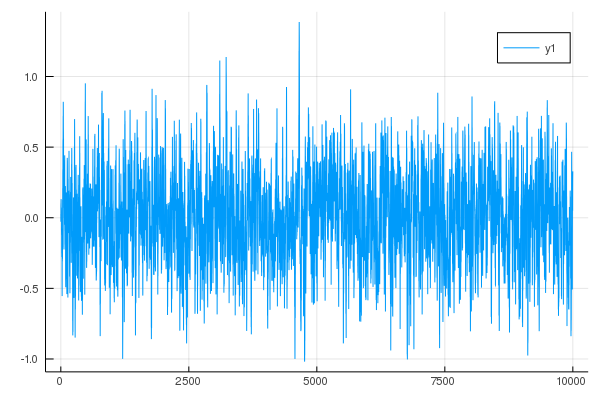

In [2]:
x = filt(ones(10), [10], randn(10000))
plot(x)

In [3]:
S = welch_pgram(x)

DSP.Periodograms.Periodogram{Float64,AbstractFFTs.Frequencies{Float64}}([0.45670660971955057, 2.898298789685355, 2.68273375597892, 0.998790554163964, 1.9581284471402156, 1.1618441488388989, 1.9219076455402258, 1.10325723114737, 1.8354126754400737, 1.7544075436569286  …  0.0012093134714961681, 0.0010286783217883344, 0.0007799383029377431, 0.0007200777777351948, 0.0004324663645255822, 0.0003306746172510205, 0.00022424712053325426, 0.00028892246241341517, 0.00017369040699587014, 9.228943580876106e-5], [0.0, 0.0008, 0.0016, 0.0024000000000000002, 0.0032, 0.004, 0.0048000000000000004, 0.0056, 0.0064, 0.007200000000000001  …  0.4928, 0.49360000000000004, 0.4944, 0.49520000000000003, 0.496, 0.4968, 0.49760000000000004, 0.4984, 0.49920000000000003, 0.5])

┌ Info: Precompiling SpectralDistances [2b0dec9d-f767-4f95-9e73-7df56487de68]
└ @ Base loading.jl:1273


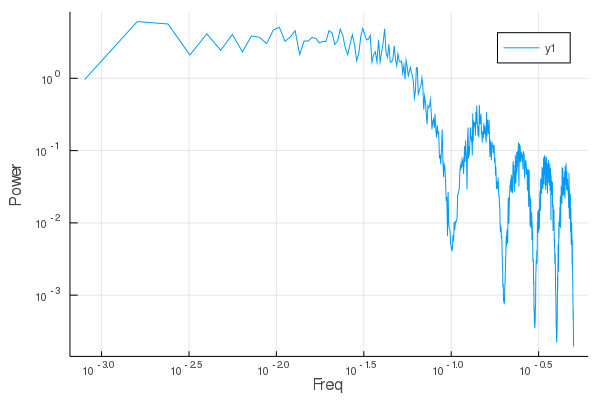

In [4]:
using SpectralDistances
plot(S)

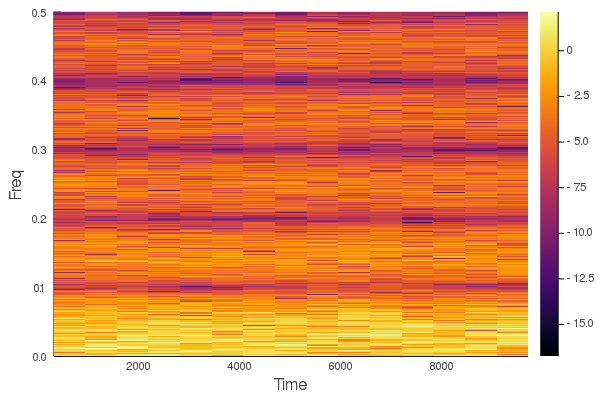

In [5]:
S = spectrogram(x)
plot(S)

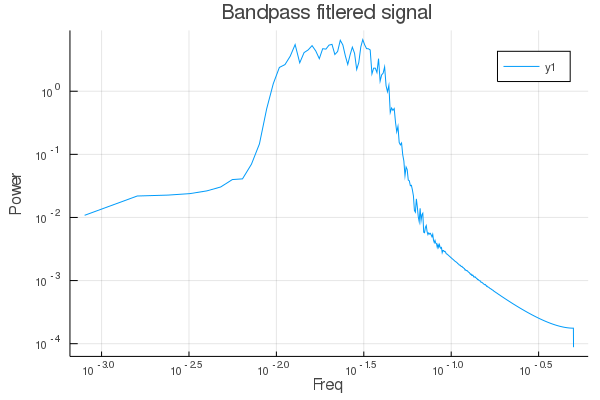

In [6]:
responsetype = Bandpass(10, 40; fs=1000)
designmethod = Butterworth(4)
xf = filt(digitalfilter(responsetype, designmethod), x)
plot(welch_pgram(xf), title="Bandpass fitlered signal")

2 ||x-z||₂ 0.0000000000


┌ Info: ||x-z||₂ ≤ tol
└ @ LPVSpectral /home/fredrikb/.julia/dev/LPVSpectral/src/lasso.jl:147


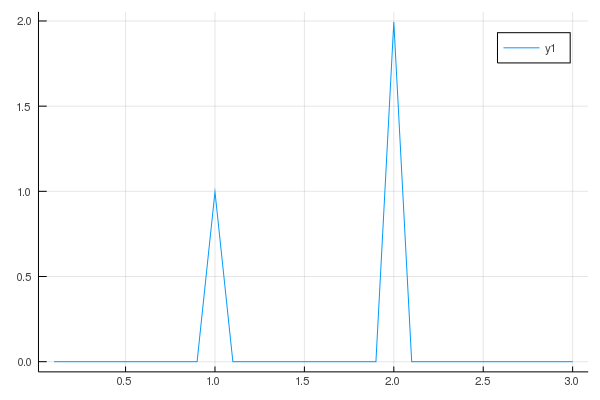

In [51]:
using LPVSpectral, ProximalOperators
t = 0:0.1:100
x = sin.(2pi .* t) + √2sin.(2pi .* 2 .*t)
s,w = ls_sparse_spectral(x,t,0.1:0.1:3; proxg=NormL1(0.01))
plot(w, clamp.(abs2.(s), 1e-5,Inf))
